**Importing libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

**Import dataset**

In [2]:
iris = pd.read_csv("IRIS_ Flower_Dataset.csv")

**Explore dataset**

Let's take a look at the contents of the dataset :

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

This dataset has 150 rows and 5 columns



In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
 iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

After looking at the results of the 2 previous calls we can observe that:
- there is no empty cell
- the input parameters (sepal_length, sepal_width, petal_length, petal_width) are all floats
- the classification outcome (species) is an object (most probably a string)

Let's now get an idea of the number of unique values in each column :

In [7]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

Let's look at the classification values and confirm they are strings :

In [8]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Let's take a look at the statistical information to get a better insight into the data and check that there are no obvious outliers. For example, negative values for width and length or clearly too large or too small values

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's see if the dataset is well balanced in terms of classification :

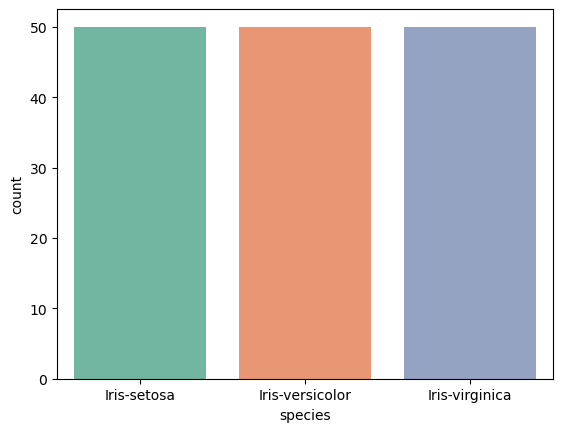

In [10]:
sns.countplot(x='species', data=iris, palette='Set2')
plt.show()

At this step we can conclude that the values seem consistent and the dataset is well balanced

**Cleaning**

We have seen above that there are no empty values, no outiers and that the dataset is well balanced so there is no need to do any kind of cleaning

**Training**

Let's split the dataset into an input parameter set and an output classification set :

In [11]:
X=iris.drop(['species'],axis='columns')
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y=iris.species
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

Let's split into a training set and test set : 

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 2)

Let's build a model :

In [14]:
model = SVC()

Let's train the model on the training set :

In [15]:
model.fit(X_train,y_train)

SVC()

**Testing**

In [16]:
model.score(X_test,y_test )

0.9736842105263158

The score of 97.4 % is already pretty good

In [17]:
y_predict = model.predict(X_test)

Let's have a look at the confusion matrix to display the number of false positives and false negatives :

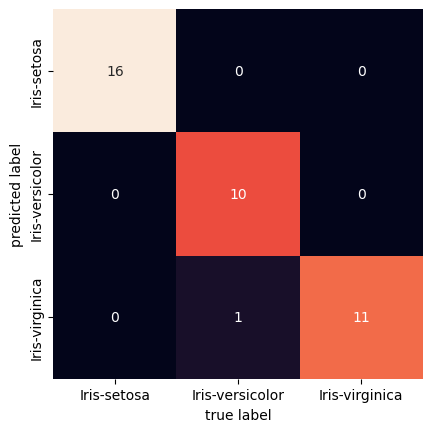

In [18]:
mat = confusion_matrix(y_test,y_predict)
sns.heatmap(mat.T, square = True,annot=True,fmt='d',cbar=False,xticklabels=iris['species'].unique(),yticklabels=iris.species.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

**Improvement phase**

Let's test a number of different values for the hyperparameters. The selected values below for the hyper-parameters were found through trial and error and also by doing some search on the Internet

In [19]:
param_grid = {'C':[1,5,10,50],'gamma':[0.0001,0.0005,0.001,0.005],'kernel':['rbf', 'poly','sigmoid']}
grid = GridSearchCV(model,param_grid)
%time grid.fit(X_train,y_train)
print(grid.best_params_)

CPU times: total: 1.44 s
Wall time: 2.46 s
{'C': 50, 'gamma': 0.005, 'kernel': 'rbf'}


Let's use the suggested hyper-parameter values : 

In [20]:
model = SVC(C=50,gamma=0.005)

In [21]:
model.fit(X_train,y_train)

SVC(C=50, gamma=0.005)

In [22]:
model.score(X_test,y_test )

1.0

Definitely better !

In [23]:
y_predict = model.predict(X_test)

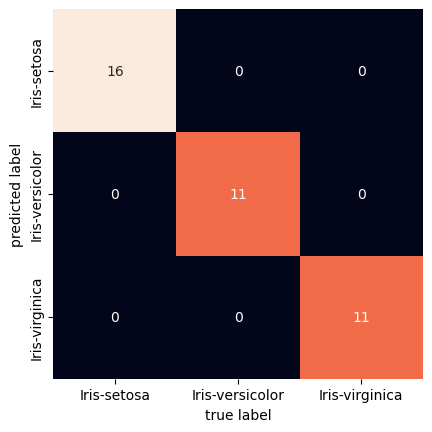

In [24]:
mat = confusion_matrix(y_test,y_predict)
sns.heatmap(mat.T, square = True,annot=True,fmt='d',cbar=False,xticklabels=iris['species'].unique(),yticklabels=iris.species.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

**Saving the model**

Let's save the model in a file :

In [25]:
from joblib import dump, load
dump(model, 'model_iris.joblib') 

['model_iris.joblib']

Let's test that the saved model is OK :

In [26]:
model_2 = load('model_iris.joblib') 

In [27]:
model_2.fit(X_train,y_train)

SVC(C=50, gamma=0.005)

In [28]:
model_2.score(X_test,y_test )

1.0